check images with different labels

In [1]:
from dataset import *
from train import *

In [2]:
import os
import pandas as pd

import collections

import sys

import torch
import torch.optim as optim

import gdal
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set parameters
EuroSat_Type = 'ALL'    

In [4]:
if EuroSat_Type == 'RGB':
  data_folder = '/content/sample_data/'
  #root = os.path.join(data_folder, '2750/')
  root = '2750/'
  download_ON = os.path.exists(root)

  if not download_ON:
    # This can be long...
    #os.chdir(data_folder)
    os.system('wget http://madm.dfki.de/files/sentinel/EuroSAT.zip') #Just RGB Bands
    !unzip EuroSAT.zip
    download_ON = True
elif EuroSat_Type == 'ALL':
    root = 'ds/images/remote_sensing/otherDatasets/sentinel_2/tif/'
    download_ON = os.path.exists(root)
    if not download_ON:
      os.system('wget http://madm.dfki.de/files/sentinel/EuroSATallBands.zip') #All bands
      !unzip EuroSATallBands.zip
      download_ON = True

In [86]:
geo_df = pd.read_csv("metadata_clustered10.csv")

In [87]:
data = torchvision.datasets.DatasetFolder(root=root,loader = iloader, transform = None, extensions = 'tif')
labels = [v[1] for (i, v) in enumerate(data)]

In [92]:
classes = list(set(labels))

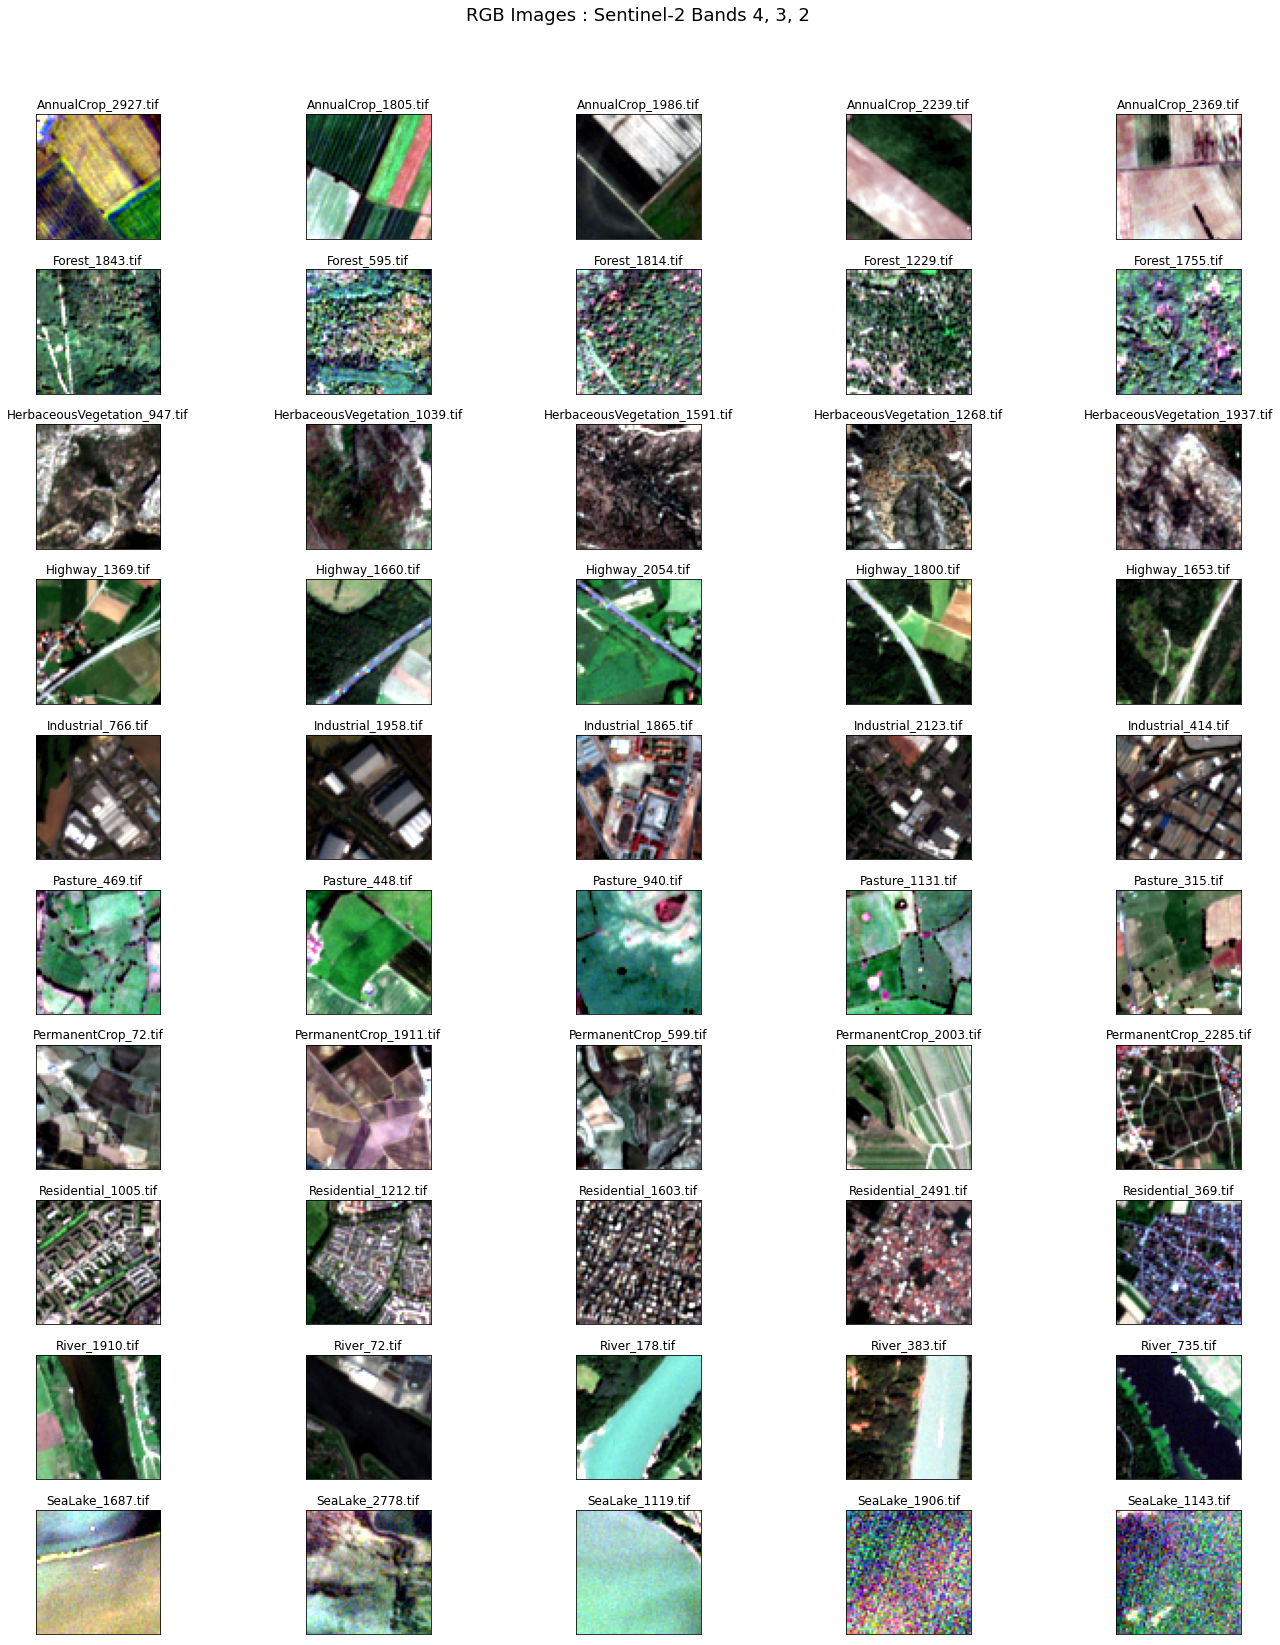

In [93]:

# define figure content
nrows=len(classes); ncols=5

# create figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 24))
fig.suptitle('RGB Images : Sentinel-2 Bands 4, 3, 2', fontsize=18)

# plot rgb bands of randomly selected test images
#test = df[ 'test']; 
bands = [ 4,3,2 ]
for row in range(10):

    # pick random sample from each class population
    subset = geo_df[(geo_df["class"] == row)]
    sample = subset.sample(ncols) 
    
    col = 0
    for idx, record in sample.iterrows():
        
        # use gdal to open multispectral 16-bit imagery
        ds = gdal.Open( record["path"] )
        
        rgb = []
        for bid in bands:

            # read band data
            band = np.asarray( ds.GetRasterBand( bid ).ReadAsArray(), dtype=float )
            
            # compute 16-bit to 8bit min / max scaling factors
            r = np.percentile( band, [ 2, 98 ] )            
            band = (( band - r[0]) / (r[1] - r[0] ) ) * 255.0
            
            # clip to 8bit
            band = np.clip( band, a_min=0.0,a_max=255.0 )
            rgb.append ( np.asarray( band, dtype=np.uint8 ) )
            
        # display rgb image and filename title
        axes[ row ][ col ].imshow( np.asarray( np.dstack( rgb ) ) )
        axes[ row ][ col ].set_title( '{}'.format ( os.path.basename(record["path"] ) ) )
        
        # remove axes ticks
        axes[ row ][ col ].get_xaxis().set_ticks([])
        axes[ row ][ col ].get_yaxis().set_ticks([])
        
        col += 1

# tight layout with adjustment
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
        

In [94]:
def plots_cluster(geo_df, cluster_id = 0, group_by = "cluster"):
    # define figure content
    classes = list(set(geo_df[(geo_df[group_by] == cluster_id)]["class"]))
    nrows = len(classes); ncols = 5

    # create figure
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 24))
    fig.suptitle('RGB Images : Sentinel-2 Bands 4, 3, 2', fontsize=18)

    # plot rgb bands of randomly selected test images
    #test = df[ 'test']; 
    bands = [ 4,3,2 ]


    for row in range(len(classes)):

        # pick random sample from each class population
        subset = geo_df[(geo_df["class"] == classes[row]) & (geo_df[group_by] == cluster_id)]
        sample = subset.sample(ncols) 

        col = 0
        for idx, record in sample.iterrows():

            # use gdal to open multispectral 16-bit imagery
            ds = gdal.Open( record["path"] )

            rgb = []
            for bid in bands:

                # read band data
                band = np.asarray( ds.GetRasterBand( bid ).ReadAsArray(), dtype=float )

                # compute 16-bit to 8bit min / max scaling factors
                r = np.percentile( band, [ 2, 98 ] )            
                band = (( band - r[0]) / (r[1] - r[0] ) ) * 255.0

                # clip to 8bit
                band = np.clip( band, a_min=0.0,a_max=255.0 )
                rgb.append ( np.asarray( band, dtype=np.uint8 ) )

            # display rgb image and filename title
            axes[ row ][ col ].imshow( np.asarray( np.dstack( rgb ) ) )
            axes[ row ][ col ].set_title( '{}_{}'.format ( classes[row], os.path.basename(record["path"] ) ) )

            # remove axes ticks
            axes[ row ][ col ].get_xaxis().set_ticks([])
            axes[ row ][ col ].get_yaxis().set_ticks([])

            col += 1

    # tight layout with adjustment
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


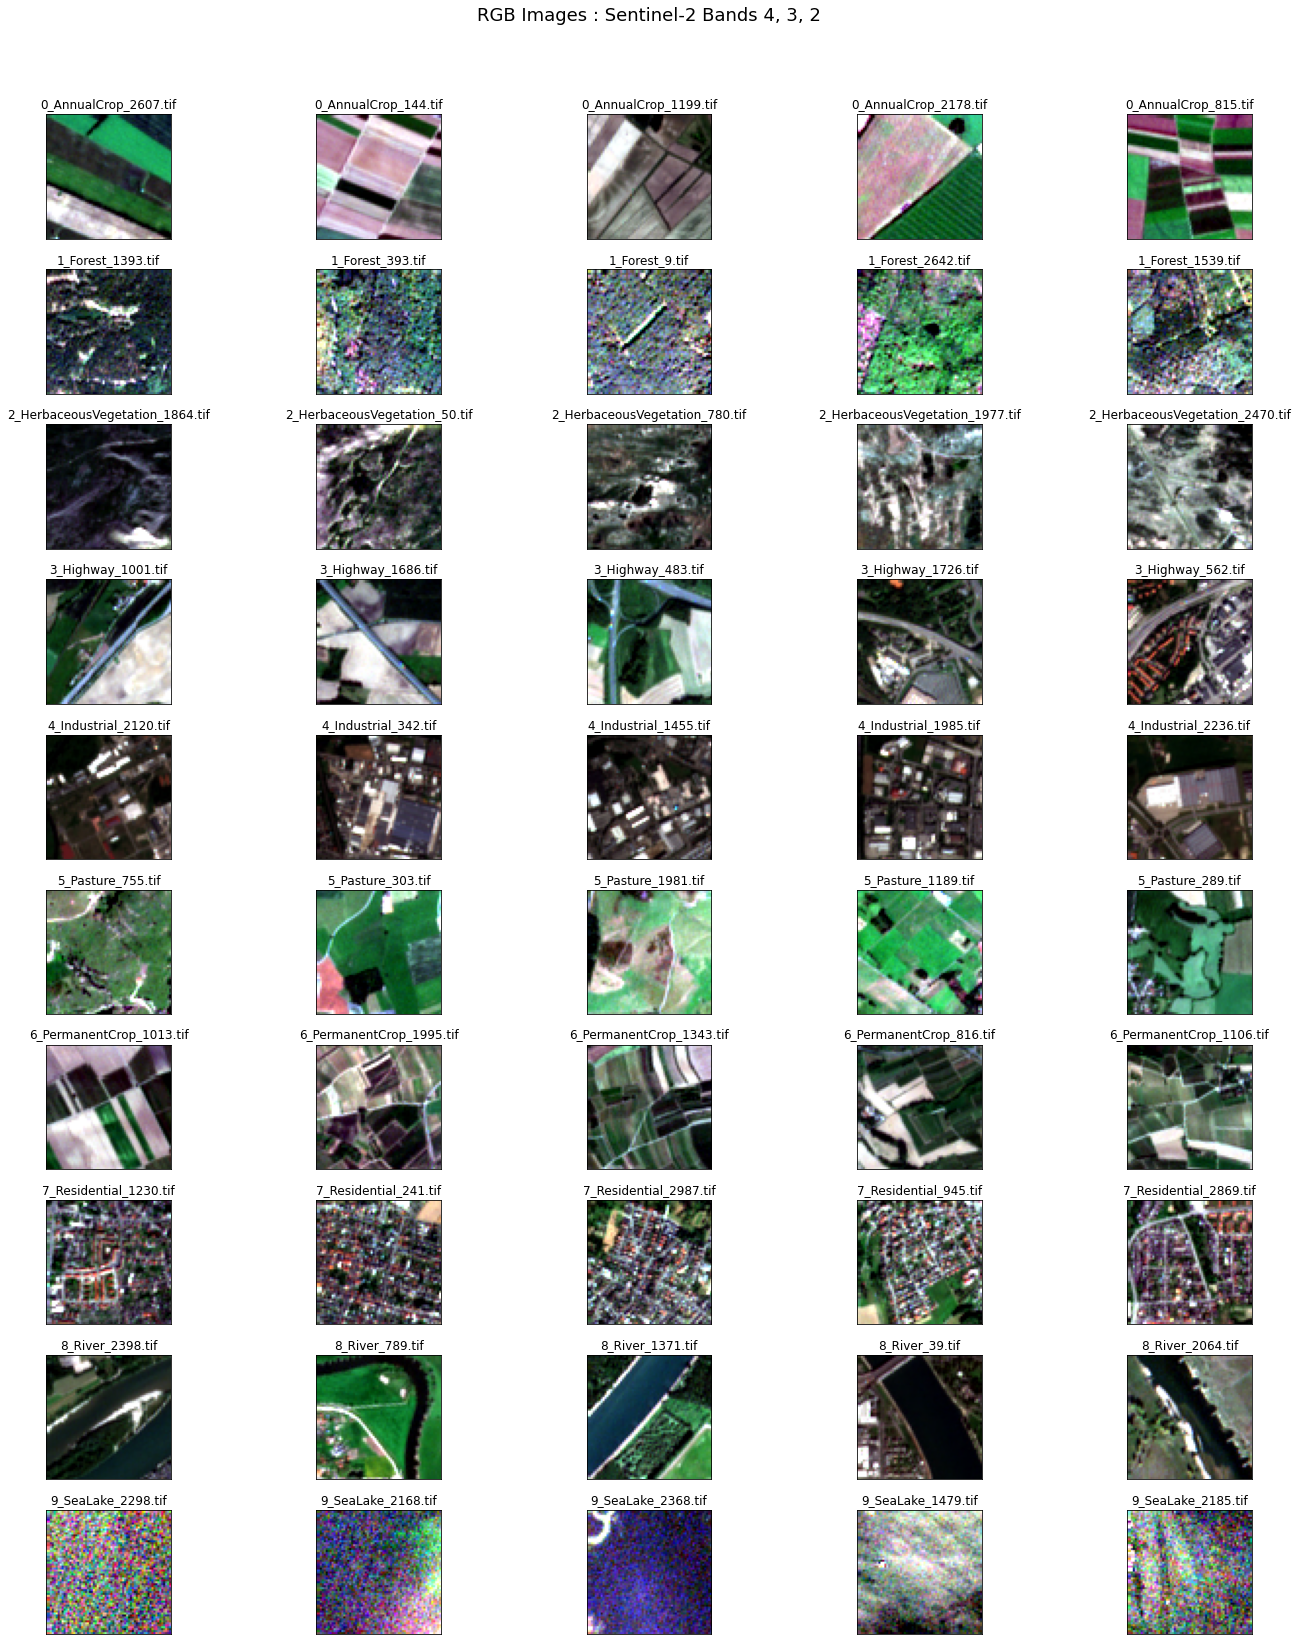

In [97]:
plots_cluster(geo_df, cluster_id = 2, group_by = "cluster")

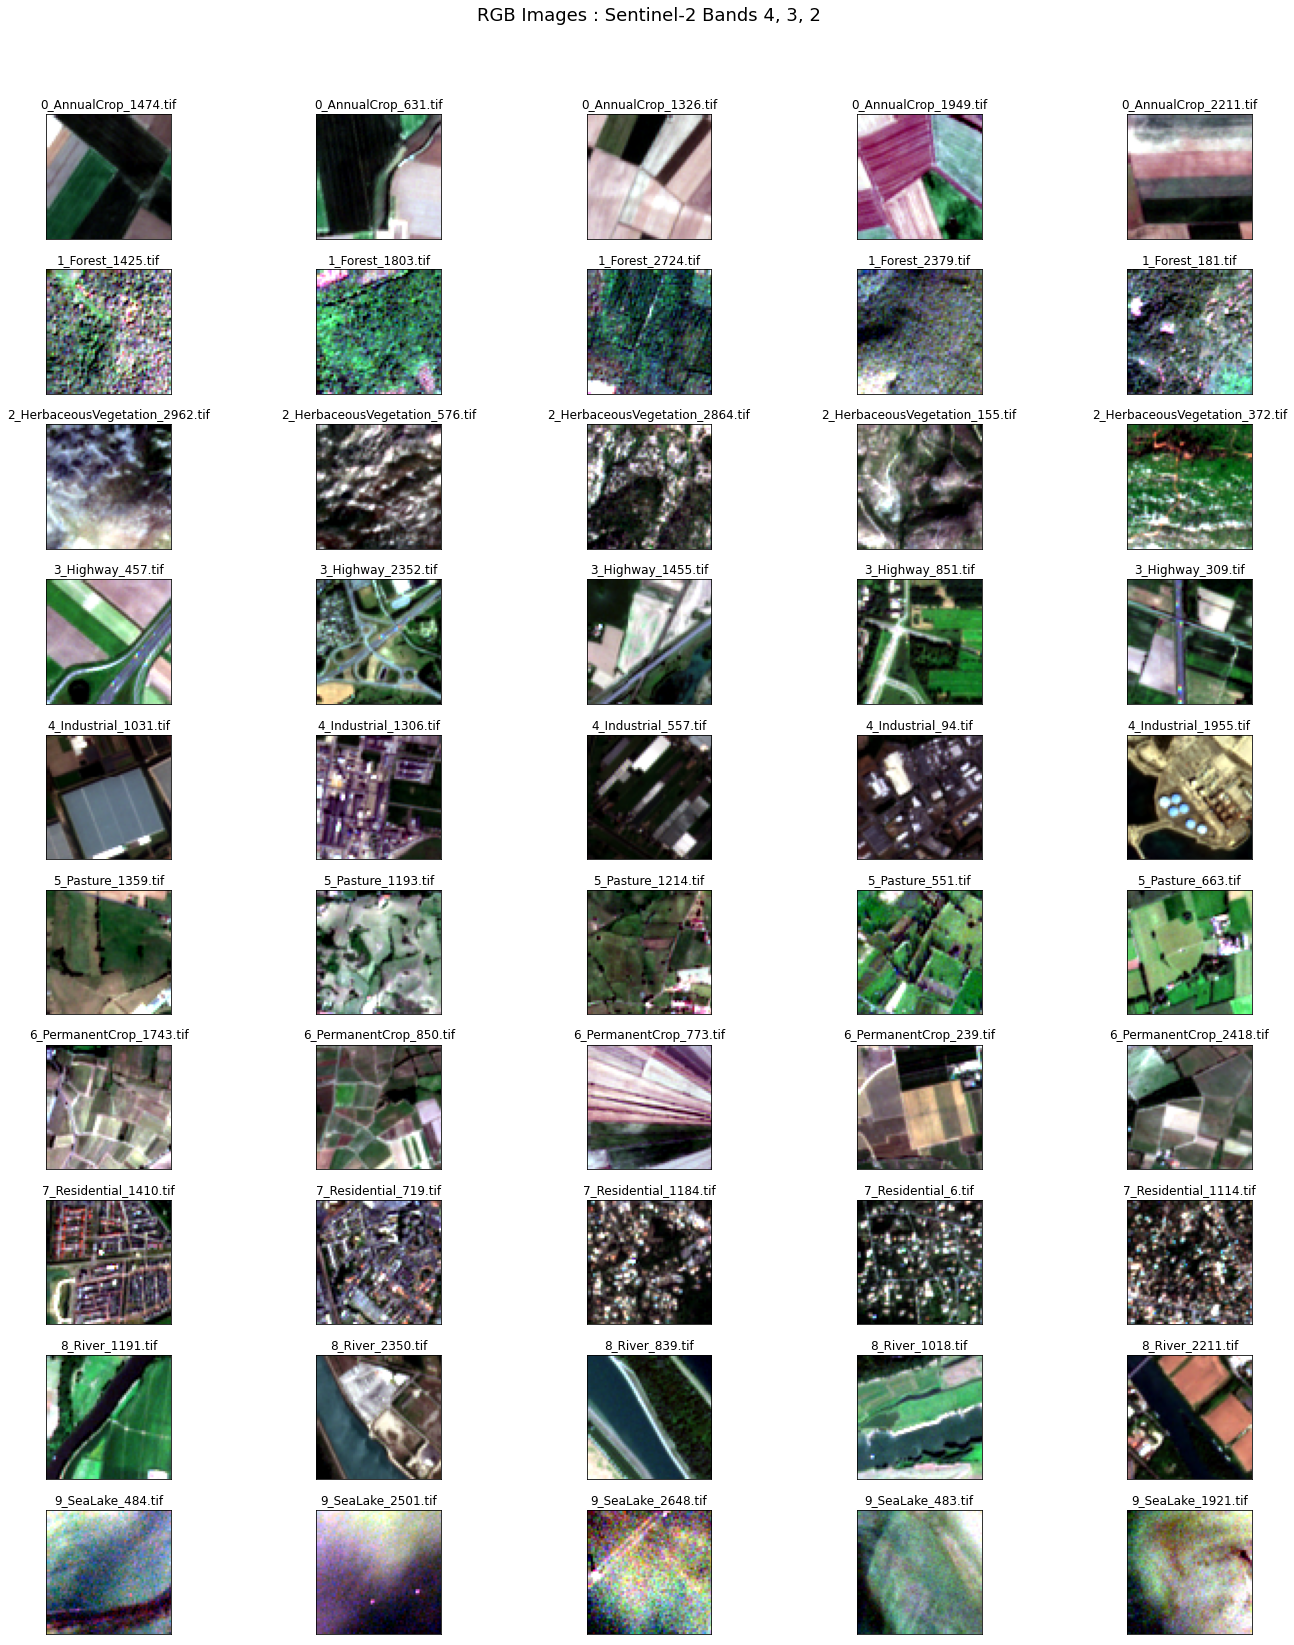

In [98]:
plots_cluster(geo_df, cluster_id = 7, group_by = "cluster")

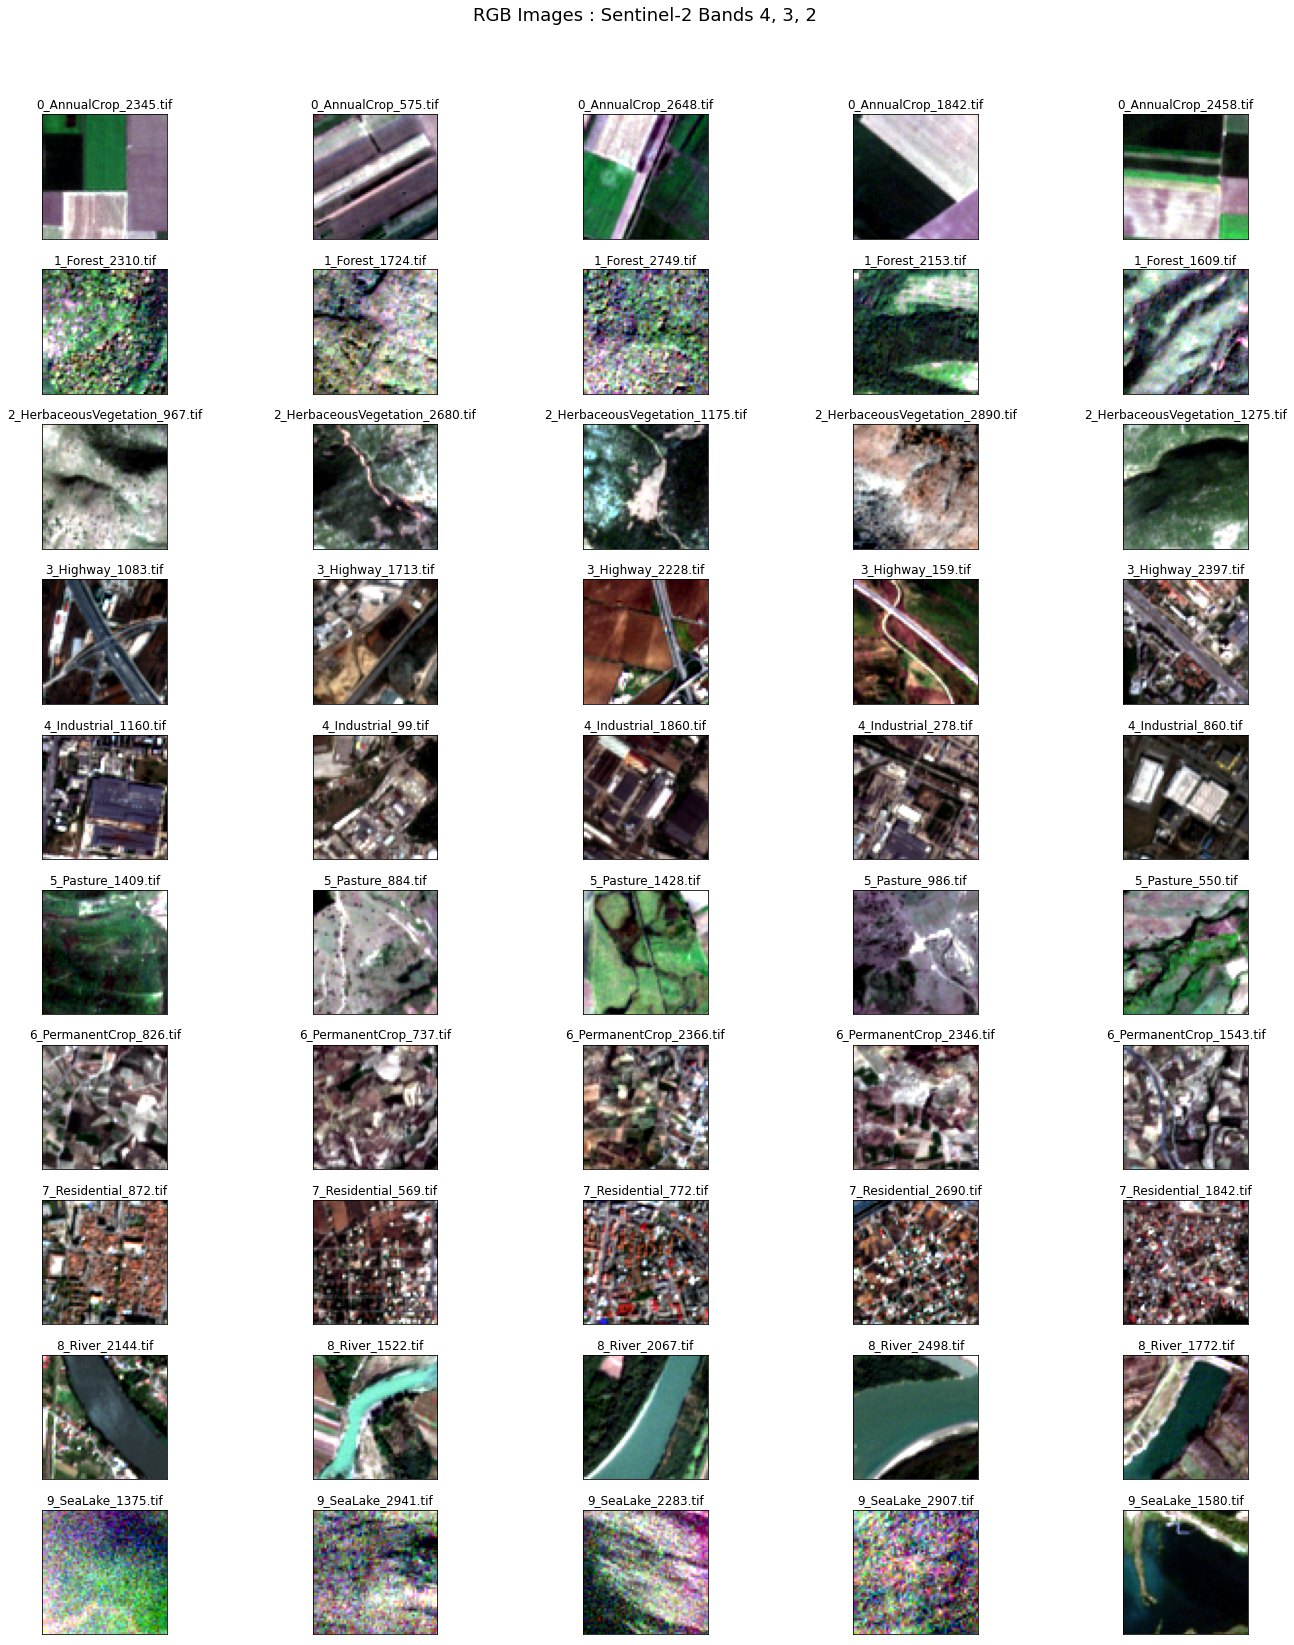

In [99]:
plots_cluster(geo_df, cluster_id = 9, group_by = "cluster")